In [4]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

%matplotlib inline

In [2]:
#import the dataset
dataset = pd.read_csv('Cupcakes vs Muffins.csv')
dataset.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


In [3]:
# split the datasets into input and output
X = dataset[['Flour', 'Sugar']].values
y = np.where(dataset['Type']=='Muffin', 0, 1)

In [5]:
# choose the model
model = svm.SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

In [6]:
# plot the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx -(model.intercept_[0]) / w[1]

b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

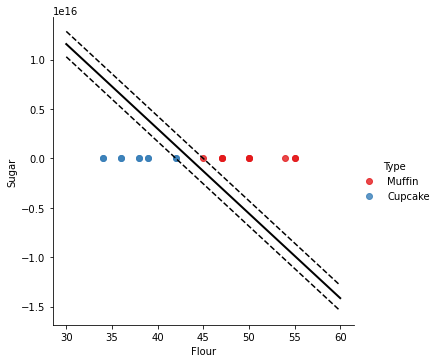

In [7]:
sns.lmplot(x='Flour',y='Sugar', data=dataset, palette='Set1',fit_reg=False, hue='Type');
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [13]:
# make a function
def zoom(Flour, Sugar):
    if (model.predict([[Flour, Sugar]]))==0:
        print("you are looking at muffin recipe")
    else:
        print('you are looking at cupcake')
        

zoom(70, 100)

you are looking at muffin recipe


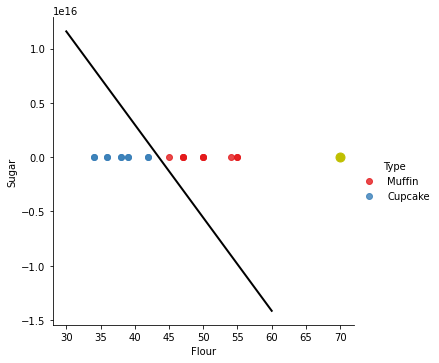

In [16]:
sns.lmplot(x='Flour',y='Sugar', data=dataset, palette='Set1',fit_reg=False, hue='Type');
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(70, 100,'yo', markersize='9')